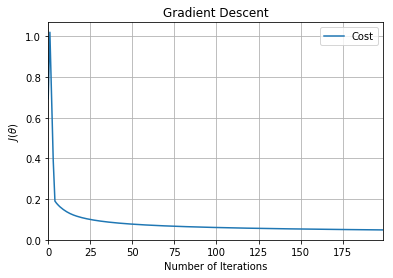

Accuracy after 200 iterations: 0.9844


In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import slogreg as slr

digits = load_digits()
X = digits.data
y = (digits.target == 3).astype(int)

m = X.shape[0]
n = X.shape[1] + 1
X = np.column_stack((X, np.ones(m)))
theta = np.zeros(n)

alpha = 0.01
n_iters = 200
J_hist = []
for _ in range(n_iters):
    theta, J = slr.gradient_descent(X, y, theta, alpha)
    J_hist.append(J)
    
pd.Series(J_hist).plot()
plt.title('Gradient Descent')
plt.xlabel('Number of Iterations')
plt.ylabel(r'$J(\theta)$')
plt.legend(['Cost'])
plt.grid()
plt.show()

accuracy = ((slr.predict_prob(X, theta) >= 0.5) == y).sum() / len(y)
print('Accuracy after {} iterations: {:.4f}'.format(n_iters, accuracy))

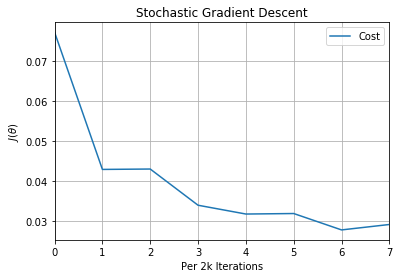

Accuracy after 10 passes through the dataset (17,970 iterations): 0.9839


In [2]:
theta = np.zeros(n)

alpha = 0.001
n_passes = 10
J_hist = []
for _ in range(n_passes):
    for i in range(m):
        x = X[i, :].reshape((1, n))
        theta, J = slr.gradient_descent(x, y[[i]], theta, alpha)
        J_hist.append(J)

n_examples = 2000
J_mean = [np.mean(J_hist[n_examples*i:n_examples*(i+1)]) for i in range(len(J_hist) // n_examples)]
pd.Series(J_mean).plot()
plt.title('Stochastic Gradient Descent')
plt.xlabel('Per 2k Iterations')
plt.ylabel(r'$J(\theta)$')
plt.legend(['Cost'])
plt.grid()
plt.show()

accuracy = ((slr.predict_prob(X, theta) >= 0.5) == y).sum() / len(y)
print('Accuracy after {} passes through the dataset ({:,} iterations): {:.4f}'
      .format(n_passes, n_passes * m, accuracy))